In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from st_dbscan import ST_DBSCAN

In [2]:
df = pd.read_csv('sugarcane_base.csv')
df.head()

,year,month,longitude,latitude,ingenio,hacienda,area,variedad,edad,corte,...,T2M_MIN,densidad_aparente_0-30cm_mean,intercambio_catiónico_0-30cm_mean,fraccion_gruesa_0-30cm_mean,arcillas_0-30cm_mean,nitrogeno_0-30cm_mean,ph_0-30cm_mean,arena_0-30cm_mean,limo_0-30cm_mean,carbono_organico_0-30cm_mean
0,2007,5,-76.38,3.24,13,MA,4.87,CC 85-92,7.03,1,...,10.63,1.35,19.37,7.23,35.10,21.30,5.83,23.07,41.80,32.77
1,2007,5,-76.37,3.56,13,MA,4.87,CC 85-92,7.03,1,...,12.42,1.41,22.03,4.33,39.63,22.00,5.87,20.70,39.67,33.37
2,2007,5,-76.48,3.34,13,MA,4.87,CC 85-92,7.03,1,...,12.42,1.37,20.60,4.10,41.80,25.70,5.60,22.47,35.70,38.50
3,2007,5,-76.31,3.40,13,MA,4.87,CC 85-92,7.03,1,...,12.42,1.41,22.90,2.50,35.63,21.96,5.93,26.60,37.77,26.30
4,2007,5,-76.30,3.26,13,MA,4.87,CC 85-92,7.03,1,...,12.42,1.34,18.53,6.03,37.20,20.22,5.73,23.70,39.17,31.67


In [3]:
# normalize the data 
df['longitude'] = (df['longitude'] - df['longitude'].min()) / (df['longitude'].max() - df['longitude'].min())
df['latitude'] = (df['latitude'] - df['latitude'].min()) / (df['latitude'].max() - df['latitude'].min())
# transform to numpy array
data = df.loc[:, ['year','longitude','latitude']].values

In [4]:
st_dbscan = ST_DBSCAN(eps1 = 0.05, eps2 = 10, min_samples = 5) 
# for list of all parameter description see - src code comments

In [5]:
clusters = st_dbscan.fit(data) 

In [6]:
def plot(data, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    
    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]
        
        clust = data[np.where(labels==i)]
        plt.scatter(clust[:,0], clust[:,1], c=[col], s=1)
    plt.show()

    return None

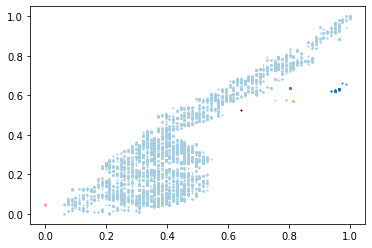

In [7]:
plot(data[:,1:], st_dbscan.labels)

In [8]:
st_dbscan.labels.max()

4

In [9]:
st_dbscan.metric

'euclidean'

In [10]:
st_dbscan.min_samples

5

In [11]:
clusters.n_jobs

-1

In [12]:
len(clusters.labels)

20805

In [13]:
type(clusters.labels)

numpy.ndarray

In [14]:
pd.Series(clusters.labels)

0        0
1        0
2        0
3        0
4        0
        ..
20800    0
20801    0
20802    0
20803    0
20804    0
Length: 20805, dtype: int64

In [15]:
df['cluster'] = pd.Series(clusters.labels)

In [16]:
df.head()

,year,month,longitude,latitude,ingenio,hacienda,area,variedad,edad,corte,...,densidad_aparente_0-30cm_mean,intercambio_catiónico_0-30cm_mean,fraccion_gruesa_0-30cm_mean,arcillas_0-30cm_mean,nitrogeno_0-30cm_mean,ph_0-30cm_mean,arena_0-30cm_mean,limo_0-30cm_mean,carbono_organico_0-30cm_mean,cluster
0,2007,5,0.320988,0.104265,13,MA,4.87,CC 85-92,7.03,1,...,1.35,19.37,7.23,35.10,21.30,5.83,23.07,41.80,32.77,0
1,2007,5,0.333333,0.255924,13,MA,4.87,CC 85-92,7.03,1,...,1.41,22.03,4.33,39.63,22.00,5.87,20.70,39.67,33.37,0
2,2007,5,0.197531,0.151659,13,MA,4.87,CC 85-92,7.03,1,...,1.37,20.60,4.10,41.80,25.70,5.60,22.47,35.70,38.50,0
3,2007,5,0.407407,0.180095,13,MA,4.87,CC 85-92,7.03,1,...,1.41,22.90,2.50,35.63,21.96,5.93,26.60,37.77,26.30,0
4,2007,5,0.419753,0.113744,13,MA,4.87,CC 85-92,7.03,1,...,1.34,18.53,6.03,37.20,20.22,5.73,23.70,39.17,31.67,0


In [17]:
df.to_csv('sugarcane_spatial_cluster.csv', index = False)